In [ ]:
from octo.data.oxe import make_oxe_dataset_kwargs_and_weights
from octo.data.dataset import make_interleaved_dataset

# when running make_dataset, octo takes in a trajectory, adds the transform, and does normalization over that dataset to normalize over its mean and std
# so everything is obvi mean 0, sd 1

# now im gonna visualization pre-normalization
# if these are all on the same scale, then we should be multiplying by speed/ frame_rate at eval time
# otherwsie, we don't need to

def get_kwargs(name):
    dataset_kwargs_list, sample_weights = make_oxe_dataset_kwargs_and_weights(
        [(name, 1.0)],
        "gs://gnm_rlds_separate/",
        load_camera_views=("primary",),
    )
    return dataset_kwargs_list, sample_weights

def get_actions(dataset_kwargs_list, sample_weights):
    SHUFFLE_BUFFER_SIZE=1000
    BATCH_SIZE=8
    dataset = make_interleaved_dataset(
        dataset_kwargs_list,
        sample_weights,
        shuffle_buffer_size=SHUFFLE_BUFFER_SIZE,
        batch_size=BATCH_SIZE,
        train=True,
    )
    iterator = dataset.iterator(prefetch=1)

    dim0, dim1 = [], []

    for i in range(5000):
        batch = next(iterator)
        x = batch['action'][:, 0, 0, 0]
        y = batch['action'][:, 0, 0, 1]

        dim0.extend(x)
        dim1.extend(y)

    return dim0, dim1

def plot(name):
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) 
    dataset_kwargs_list, sample_weights = get_kwargs(name)
    dim0, dim1 = get_actions(dataset_kwargs_list, sample_weights)
    # Using histograms instead of line plots
    ax1.hist(dim0, bins='auto')  # 'auto' lets matplotlib decide the number of bins
    ax1.set_title("dim0")
    ax2.hist(dim1, bins='auto')  # Same for dim1
    ax2.set_title("dim1")

    # Setting x-axis limits
    # ax1.set_xlim(-12, 12)
    # ax2.set_xlim(-12, 12)

    plt.show()



2024-04-13 21:31:43.227990: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2024-04-13 21:31:44.044854: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization



######################################################################################
# Loading the following 1 datasets (incl. sampling weight):                         #
# sacson_dataset: ==========================================================1.000000 #
######################################################################################



2024-04-13 21:31:46.405319: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


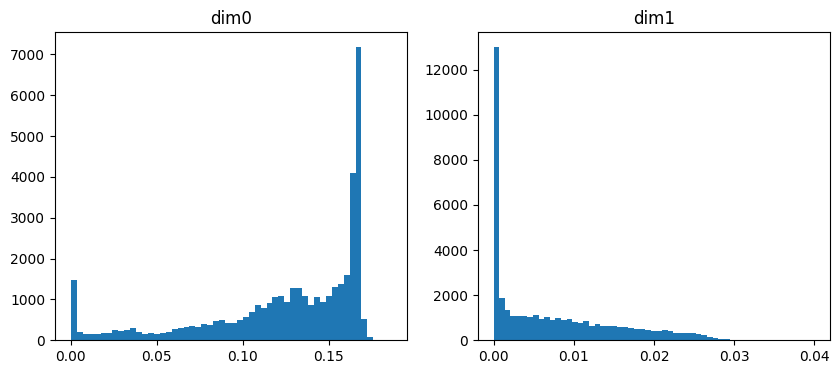

In [ ]:
plot("sacson_dataset")

2024-04-13 21:31:53.477353: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2024-04-13 21:31:53.923253: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization



######################################################################################
# Loading the following 1 datasets (incl. sampling weight):                         #
# cory_hall_dataset: =======================================================1.000000 #
######################################################################################



2024-04-13 21:31:56.439100: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


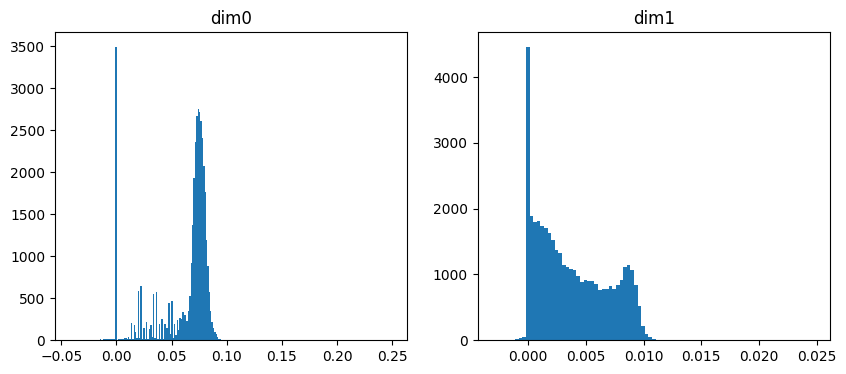

In [ ]:
plot("cory_hall_dataset")

2024-04-13 21:32:05.475002: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2024-04-13 21:32:06.111423: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization



######################################################################################
# Loading the following 1 datasets (incl. sampling weight):                         #
# recon_dataset: ===========================================================1.000000 #
######################################################################################



2024-04-13 21:32:08.217079: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


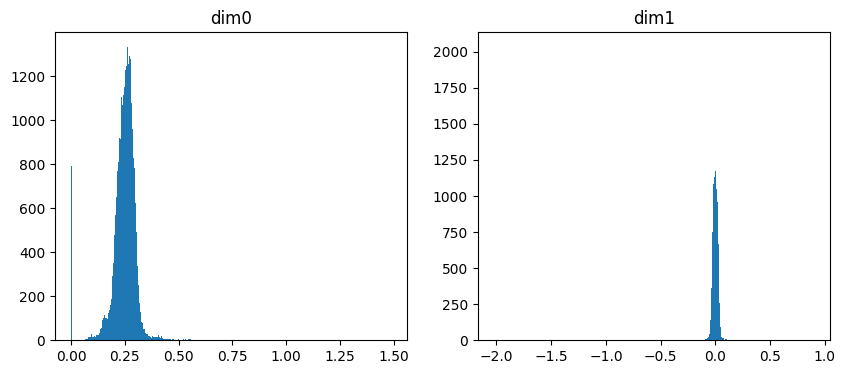

In [ ]:
plot("recon_dataset")

2024-04-13 21:32:19.068238: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2024-04-13 21:32:19.683208: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization



######################################################################################
# Loading the following 1 datasets (incl. sampling weight):                         #
# seattle_dataset: =========================================================1.000000 #
######################################################################################



2024-04-13 21:32:21.418178: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


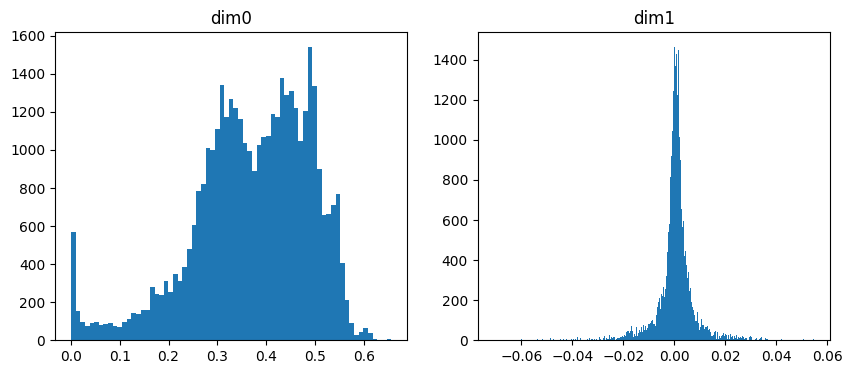

In [ ]:
plot("seattle_dataset")

2024-04-13 21:44:43.122827: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2024-04-13 21:44:43.767660: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization



######################################################################################
# Loading the following 1 datasets (incl. sampling weight):                         #
# tartan_drive_dataset: ====================================================1.000000 #
######################################################################################



2024-04-13 21:44:46.349536: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


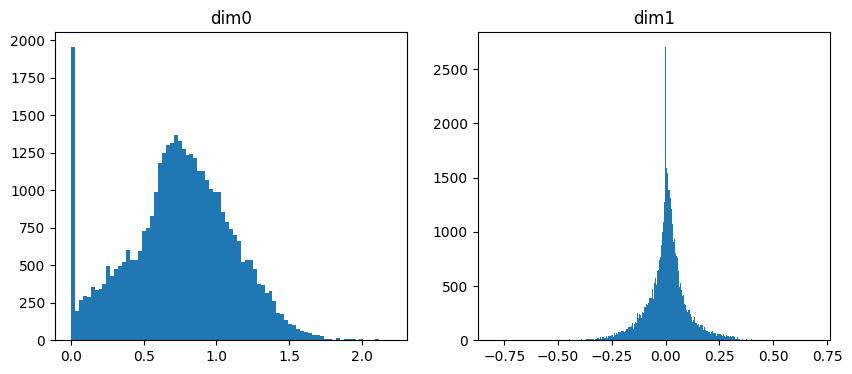

In [ ]:
plot("tartan_drive_dataset")

In [ ]:
# make_single_dataset yields entire trajectories
traj = next(iterator)
print("Top-level keys: ", traj.keys())
print("Observation keys: ", traj["observation"].keys())
print("Task keys: ", traj["task"].keys())

Top-level keys:  dict_keys(['observation', 'task', 'action', 'dataset_name', 'action_pad_mask'])
Observation keys:  dict_keys(['image_primary', 'timestep', 'pad_mask_dict', 'timestep_pad_mask', 'task_completed'])
Task keys:  dict_keys(['language_instruction', 'pad_mask_dict'])
